All kode er skrevet i python 3.
Programmet laster inn en data fil med volum tilsatt syre og temperatur endring per volum av tilsatt syre.
Første del av koden konverterer data om til "array" som gjør databehandlingen mulig for python.

In [3]:
import numpy as np
V_HCl = [] #volume HCl list
Dt = [] #temperature list
with open('data/volum_dt.txt', 'r') as data:
    data.readline()
    for line in data:
        w1, w2 = map(float, line.strip().split(', '))
        V_HCl.append(w1)
        Dt.append(w2)
#convert lists to array
V_HCl = np.array(V_HCl)
Dt = np.array(Dt)

#print V_HCl[0]*V_HCl[0]

Finner så stigningstallet $\alpha$.

Merk her at vi bruker numpy sin innebygde funksjon "mean" som finner gjennomsnittet $\frac{1}{N}\sum_{i=1}^N x_i$, hva skjer med $\frac{1}{N}$?

In [6]:
def alpha(x,y):
    return np.mean(x*y)/np.mean(x**2)
print(alpha(V_HCl,Dt))

396.395987639


Deretter finner vi standardavviket $\sigma_\alpha$.

Igjen har vi nebyttet numpy sin funksjon "sqrt" som finner kavdratroten. Og innebygde funksjonen "sum" er også benyttet, denne returnerer summen av alle elementene i en "array".

In [8]:
def sigma(x,y):
    a = alpha(x,y)
    new_x = a*x
    return np.sqrt(sum((y-new_x)**2)/(len(x)-1)*sum((x**2)))
print(sigma(V_HCl,Dt))

0.234204973465


Til slutt bruker vi matplotlib sin pyplot for å kunne plotte resultatene vi har funnet.



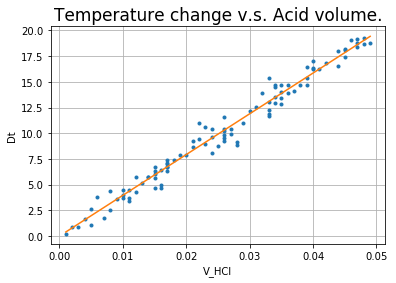

In [24]:
import matplotlib.pyplot as plt

fitted_line = alpha(V_HCl,Dt)*V_HCl

plt.figure(1)
plt.grid('on')
plt.title('Temperature change v.s. Acid volume.',size=17)
plt.plot(V_HCl,Dt,'.')
plt.plot(V_HCl, fitted_line)
plt.xlabel('V_HCl')
plt.ylabel('Dt')
plt.show()